In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahon
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | hambantota
Processing Record 5 of Set 1 | acapulco
Processing Record 6 of Set 1 | bosanski novi
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | caravelas
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | kirkuk
Processing Record 16 of Set 1 | poum
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | codrington
Processing Record 23 of

Processing Record 37 of Set 4 | san jose
Processing Record 38 of Set 4 | kazachinskoye
Processing Record 39 of Set 4 | kutum
Processing Record 40 of Set 4 | hihifo
City not found. Skipping...
Processing Record 41 of Set 4 | dipolog
Processing Record 42 of Set 4 | livramento
Processing Record 43 of Set 4 | carutapera
Processing Record 44 of Set 4 | hithadhoo
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | uyovu
Processing Record 48 of Set 4 | celina
Processing Record 49 of Set 4 | xuanhua
Processing Record 50 of Set 4 | auki
Processing Record 1 of Set 5 | winslow
Processing Record 2 of Set 5 | novikovo
Processing Record 3 of Set 5 | kamen-na-obi
Processing Record 4 of Set 5 | prainha
Processing Record 5 of Set 5 | mega piston
City not found. Skipping...
Processing Record 6 of Set 5 | qaanaaq
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | miyako
Processing Reco

Processing Record 22 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 23 of Set 8 | hamilton
Processing Record 24 of Set 8 | luan
Processing Record 25 of Set 8 | sola
Processing Record 26 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 27 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 28 of Set 8 | gisborne
Processing Record 29 of Set 8 | mergui
City not found. Skipping...
Processing Record 30 of Set 8 | fez
Processing Record 31 of Set 8 | copiapo
Processing Record 32 of Set 8 | tabas
Processing Record 33 of Set 8 | batsfjord
Processing Record 34 of Set 8 | christchurch
Processing Record 35 of Set 8 | nizhniy lomov
Processing Record 36 of Set 8 | tilichiki
Processing Record 37 of Set 8 | rocha
Processing Record 38 of Set 8 | sobolevo
Processing Record 39 of Set 8 | north platte
Processing Record 40 of Set 8 | sawtell
Processing Record 41 of Set 8 | ilovita
Processing Record 42 of Set 8 | ngukurr
City not found. Skipp

Processing Record 10 of Set 12 | chifeng
Processing Record 11 of Set 12 | buraydah
Processing Record 12 of Set 12 | montichiari
Processing Record 13 of Set 12 | krasnoselkup
Processing Record 14 of Set 12 | olafsvik
Processing Record 15 of Set 12 | port hardy
Processing Record 16 of Set 12 | orlik
Processing Record 17 of Set 12 | labutta
City not found. Skipping...
Processing Record 18 of Set 12 | alta floresta
Processing Record 19 of Set 12 | sukhoy log
Processing Record 20 of Set 12 | yerbogachen
Processing Record 21 of Set 12 | rafai
Processing Record 22 of Set 12 | warrensburg
Processing Record 23 of Set 12 | bitung
Processing Record 24 of Set 12 | inverell
Processing Record 25 of Set 12 | piacabucu
Processing Record 26 of Set 12 | dharchula
Processing Record 27 of Set 12 | rockport
Processing Record 28 of Set 12 | mount isa
Processing Record 29 of Set 12 | mahibadhoo
Processing Record 30 of Set 12 | san cristobal
Processing Record 31 of Set 12 | khandagayty
Processing Record 32 of

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahon,39.8885,4.2658,73.96,73,0,3.44,ES,2021-07-18 22:00:05
1,Alofi,-19.0595,-169.9187,77.13,79,11,17.58,NU,2021-07-18 22:00:06
2,Georgetown,5.4112,100.3354,80.89,86,20,3.00,MY,2021-07-18 21:57:19
3,Hambantota,6.1241,81.1185,79.14,94,20,8.05,LK,2021-07-18 22:00:07
4,Acapulco,16.8634,-99.8901,85.21,74,13,7.34,MX,2021-07-18 22:00:08
5,Bosanski Novi,45.0458,16.3803,63.63,99,61,2.51,BA,2021-07-18 22:00:09
6,Castro,-24.7911,-50.0119,42.44,56,2,9.86,BR,2021-07-18 22:00:09
7,Caravelas,-17.7125,-39.2481,70.38,90,0,6.96,BR,2021-07-18 22:00:10
8,Vaini,-21.2000,-175.2000,76.19,83,80,14.88,TO,2021-07-18 22:00:11
9,Komsomolskiy,40.4272,71.7189,74.62,54,99,2.64,UZ,2021-07-18 22:00:11


In [13]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahon,ES,2021-07-18 22:00:05,39.8885,4.2658,73.96,73,0,3.44
1,Alofi,NU,2021-07-18 22:00:06,-19.0595,-169.9187,77.13,79,11,17.58
2,Georgetown,MY,2021-07-18 21:57:19,5.4112,100.3354,80.89,86,20,3.00
3,Hambantota,LK,2021-07-18 22:00:07,6.1241,81.1185,79.14,94,20,8.05
4,Acapulco,MX,2021-07-18 22:00:08,16.8634,-99.8901,85.21,74,13,7.34


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

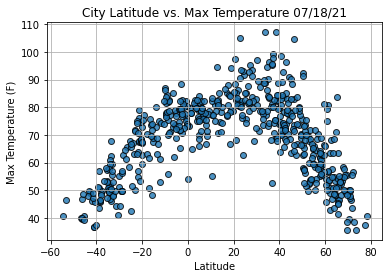

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

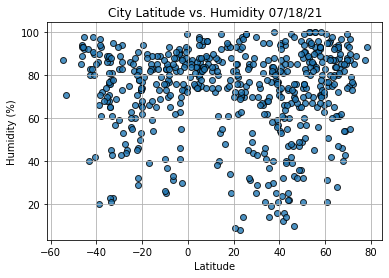

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

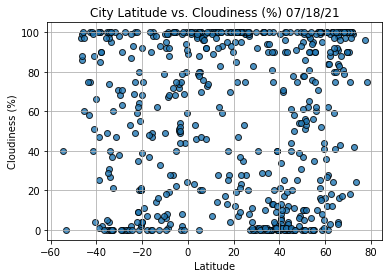

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

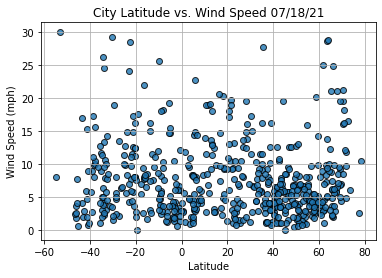

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

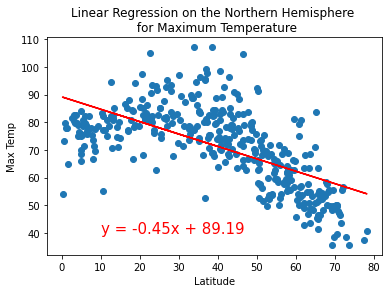

-0.6389640008366907


In [52]:
# Linear regression on the Northern Hemisphere - Lat vs Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

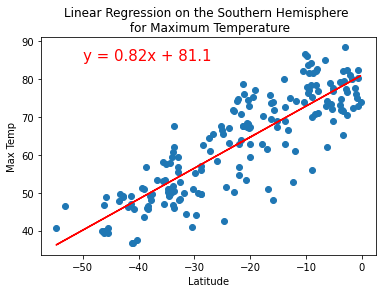

0.8533632502301636


In [53]:
# Linear regression on the Southern Hemisphere - Lat vs Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

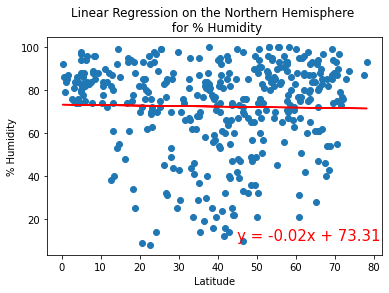

-0.021848219803032604


In [51]:
# Linear regression on the Northern Hemisphere - Lat vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

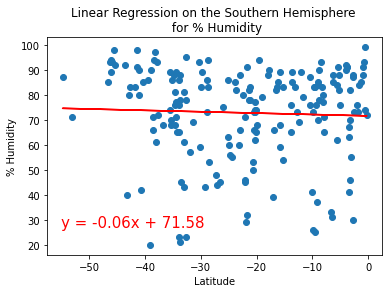

-0.041174627696936764


In [50]:
# Linear regression on the Southern Hemisphere - Lat vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,27))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

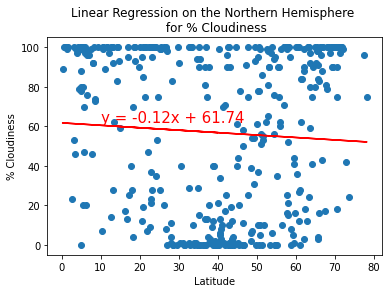

-0.0615290230311525


In [60]:
# Linear regression on the Northern Hemisphere - Lat vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,62))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

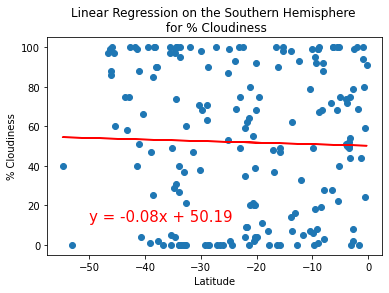

-0.028679118779862536


In [61]:
# Linear regression on the Southern Hemisphere - Lat vs Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,12))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

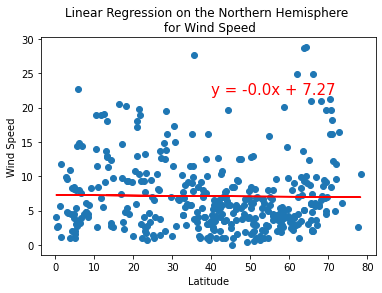

-0.015821011862285118


In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,22))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)

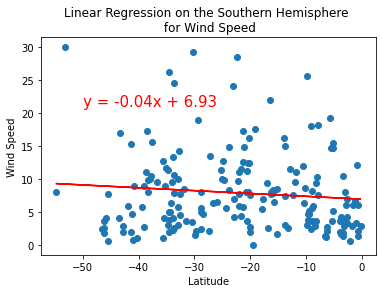

-0.09931570098440937


In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,21))
(sl, intcpt, r, p, se) = linregress(x_values, y_values)
print(r)


     active environment : PythonData
    active env location : /Users/samanthavillanueva/opt/anaconda3/envs/PythonData
            shell level : 2
       user config file : /Users/samanthavillanueva/.condarc
 populated config files : /Users/samanthavillanueva/.condarc
          conda version : 4.10.3
    conda-build version : 3.21.4
         python version : 3.8.8.final.0
       virtual packages : __osx=10.15.7=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/samanthavillanueva/opt/anaconda3  (writable)
      conda av data dir : /Users/samanthavillanueva/opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/samanthavil